# Raw text from indentures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk, string
import seaborn as sns

In [2]:
# examples from ACIS1506.20150416.ccc83295-ef68-c242-a04f-a5b8a963b8a9.7a36f988b6fb5f6cf52e494295906b8a

Refinance1 =  "In connection with a Refinancing of one or more (but not all) of the Secured Notes, Interest Proceeds in an amount equal to the lesser of (a) the amount of accrued interest on the Classes being refinanced (after giving effect to payments under the Priority of Interest Proceeds if the Redemption Date would have been a Payment Date without regard to the Refinancing) and (b) the amount the Portfolio Manager reasonably determines would have been available for distribution under the Priority of Payments for the payment of accrued interest on the Classes being refinanced on the next subsequent Payment Date as if such Notes had not been refinanced."

Cancellation1 = "(a) Any Holder may tender any Notes or beneficial interests in Notes owned by such Holder for cancellation by the Trustee without receiving any payment (any such surrendered Notes or beneficial interests in Notes, Surrendered Notes). For the avoidance of doubt, Notes surrendered by the Issuer after purchase pursuant to Section 2.13 shall not constitute Surrendered Notes. The Issuer shall provide notice to the Co-Issuer, the Trustee and the Rating Agency of any Surrendered Notes tendered to it and the Trustee shall provide notice to the Applicable Issuers of any Surrendered Note tendered to it. Any such Surrendered Notes shall be submitted to the Trustee for cancellation; provided that, for purposes of calculation of the Overcollateralization Ratio and any calculation required by Section 5.1(g), any Surrendered Notes will be deemed to remain outstanding until all Notes of the applicable Class and each Class that is senior in right of principal payment thereto in the Note Payment Sequence have been retired or redeemed, having an Aggregate Outstanding Amount equal to the Aggregate Outstanding Amount as of the date of surrender, reduced proportionately with, and to the extent of, any payments of principal on Notes of the same Class thereafter.  (b) All Surrendered Notes and Notes that are surrendered for payment, registration of transfer, exchange or redemption, surrendered by the Issuer following purchase pursuant to Section 2.13, or deemed lost or stolen shall be promptly cancelled by the Trustee and may not be reissued or resold; provided that, in the event an anticipated Optional Redemption or Partial Redemption by Refinancing does not occur, Notes that are delivered in connection with such anticipated Optional Redemption or Partial Redemption by Refinancing shall be returned by the Trustee to the Person surrendering the same. Any such Notes shall, if surrendered to any Person other than the Trustee, be delivered to the Trustee. No Notes shall be authenticated in lieu of or in exchange for any Notes canceled as provided in this Section 2.10, except as expressly permitted hereunder. All canceled Notes held by the Trustee shall be destroyed by the Trustee in accordance with its standard policy, unless the Co-Issuers shall direct by an Issuer Order received prior to destruction that they be returned to it."

Reinvestment1 = "The period from and including the Closing Date to and including the earliest of (i) May 1, 2019 (or, if such date is not a Business Day, the next succeeding Business Day) or (ii) the date of the acceleration of the Maturity of any Class of Secured Notes pursuant to Section 5.2 (Acceleration of Maturity; Rescission and Annulment)."

Restricted1 = "Each day during any period in which either (i) the S&P rating of the Class A Notes is one or more sub-categories below its Initial Rating or (ii) the S&P rating of the Class A Notes then Outstanding has been withdrawn and not reinstated; provided that such period will not be a Restricted Trading Period upon the direction of a Majority of the Controlling Class (so long as the S&P rating of the Class A Notes has not been further downgraded, withdrawn or put on watch since the receipt of such direction)."

# examples from ACASL132.20170725.f6e81d3b-671f-e7b7-63ef-4f6258f64bf8.be9827c3def852e86013998c0941d98f

Refinance2 = "A loan or an issuance of replacement securities, whose terms in each case will be negotiated by the Collateral Manager on behalf of the Issuer, from one or more financial institutions or purchasers to refinance the Secured Notes in connection with an Optional Redemption, it being understood that any rating of such replacement securities by a Rating Agency will be based on a credit analysis specific to such replacement securities and independent of the rating of the Secured Notes being refinanced."

Cancellation2  = "All Notes surrendered for payment, registration of transfer, exchange or redemption, or mutilated, defaced or deemed lost or stolen, shall be promptly canceled by the Trustee and may not be reissued or resold. No Note may be surrendered (including any surrender in connection with any abandonment, donation, gift, contribution or other event or circumstance) except (i) for payment as provided herein, (ii) for registration of transfer, exchange or redemption or (iii) for replacement in connection with any Note that is mutilated, defaced or deemed lost or stolen. Any such Notes shall, if surrendered to any Person other than the Trustee, be delivered to the Trustee. No Notes shall be authenticated or registered in lieu of or in exchange for any Notes canceled as provided in this Section 2.9, except as expressly permitted by this Indenture. All canceled Notes held by the Trustee shall be destroyed or held by the Trustee in accordance with its standard retention policy unless the Issuer shall direct by an Issuer Order received prior to destruction that they be returned to it."

Reinvestment2 = "The period from and including the ClosingRefinancing Date to and including the earliest of (i) the last day of the Collection Period immediately preceding the Payment Date in October 2017,July 2021, (ii) any date on which the Maturity of any Class of Secured Notes is accelerated following an Event of Default pursuant to this Indenture and (iii) any date on which the Collateral Manager reasonably determines that it can no longer reinvest in additional Collateral Obligations in accordance with this Indenture or the Collateral Management Agreement, provided, in the case of this clause (iii), the Collateral Manager notifies the Issuer, the Trustee (who shall notify the Holders of Notes), and the Collateral Administrator and S&P thereof at least five Business Days prior to such date."

Restricted2 = "The period during which, so long as the applicable Class of Notes is Outstanding, (a) the Moody's rating or S&P rating of the Class A-1 Notes is withdrawn (and not reinstated) or is one or more sub-categories below its rating on the Closing Date or (b) the S&P rating of the Class A-2A Notes or the Class B Notes is withdrawn (and not reinstated) or is two or more sub-categories below its rating on the Closing Date; of the Class X Notes or the Class A-R Notes (or the Fitch rating of the Class A-R Notes) is withdrawn (and not reinstated) or is one or more sub-categories below its rating on the Refinancing Date or (b) the Moody's rating of the Class B-R Notes or the Class C-R Notes is withdrawn (and not reinstated) or is two or more sub-categories below its rating on the Refinancing Date; provided that (1) such period will not be a Restricted Trading Period if (A) after giving effect to any sale (and any related reinvestment) or purchase of a Collateral Obligation, the Aggregate Principal Balance of all Collateral Obligations plus, without duplication, amounts on deposit in the Principal Collection Subaccount and the Ramp-Up Account will be at least equal to the Reinvestment Target Par Balance, (B) each test specified in the definition of Collateral Qualityof the Maximum Moody's Rating Factor Test and the Minimum Weighted Average Moody's Recovery Rate Test is satisfied and (C) each Overcollateralization Ratio Test is satisfied; (2) such period will not be a Restricted Trading Period upon the direction of the Majority of the Controlling Class, which direction shall remain in effect until the earlier of (i) a further downgrade or withdrawal of such Moody's rating or S&PFitch rating, as applicable, that, disregarding such direction, would cause the conditions set forth above to be true and (ii) a subsequent direction to the Issuer (with a copy to the Trustee, the Collateral Manager and the Collateral Administrator) by a Majority of the Controlling Class declaring the beginning of a Restricted Trading Period and (3) no Restricted Trading Period shall restrict any sale or purchase of a Collateral Obligation entered into by the Issuer at a time when a Restricted Trading Period was not in effect, regardless of whether such sale or purchase has settled."

# examples from ALM6_1.20180611.b0eca308-20af-5a81-5bc5-a16f4bca5d7a.c6a25c15a03a42853fe1bc0eac9b00b3

Refinance3 = "A loan or an issuance of replacement securities, whose terms in each case will be negotiated by the Collateral Manager on behalf of the Issuer, from one or more financial institutions or purchasers to refinance the Notes in connection with an Optional Redemption."

Cancellation3 = "All Notes surrendered for payment, cancellation pursuant to Section 9.8, registration of transfer, exchange or redemption, or mutilated, defaced or deemed lost or stolen, shall be promptly canceled by the Trustee and may not be reissued or resold. No Note may be surrendered (including in connection with any abandonment, donation, gift, contribution or other event or circumstance) except for payment as provided herein for cancellation pursuant to Section 9.8, for registration of transfer, exchange or redemption, or for replacement in connection with any Note mutilated, defaced or deemed lost or stolen. Any Notes surrendered for cancellation as permitted by this Section 2.9 shall, if surrendered to any Person other than the Trustee, be delivered to the Trustee. No Notes shall be authenticated in lieu of or in exchange for any Notes canceled as provided in this Section 2.9, except as expressly permitted by this Indenture. All canceled Notes held by the Trustee shall be destroyed or held by the Trustee in accordance with its standard retention policy unless the Applicable Issuers shall direct by an Issuer Order received prior to destruction that they be returned to it. Except in accordance with Article IX, the Issuer may not acquire any of the Notes (including any Notes voluntarily surrendered without payment or abandoned)."

Reinvestment3 = "The period from and including the Closing Date to and including the earliest of (i) the Payment Date in July 2019,January 2020 (ii) the date of the acceleration of the Maturity of any Class of Secured Notes pursuant to Section 5.2, (iii) the date on which the Collateral Manager reasonably determines that it can no longer reinvest in additional Collateral Obligations in accordance with the terms hereof or the Collateral Management Agreement and (iv) the date that Apollo Credit (or any Affiliate thereof) is removed as Collateral Manager pursuant to the terms of the Collateral Management Agreement; provided that in the case of clause (iii), the Collateral Manager notifies the Issuer, the Trustee (who shall notify the Holders of Notes) and the Collateral Administrator thereof in writing at least one Business Day prior to such date. "

Restricted3 = "The period during which (a) the Moody's rating of the Class A-1 Notes is withdrawn (and not reinstated) or is one or more sub-categories below its Initial Rating on the Third Refinancing Date; (b) the S&P rating of the Class A-1 Notes is withdrawn (and not reinstated) or is one or more sub-categories below its rating on the Third Refinancing Date or (c) the S&P rating of the Class A-1b-R3 Notes, Class A-2 Notes, Class B-1B Notes, Class B-2 Notes, Class C Notes, Class D Notes or Class E Notes is withdrawn (and not reinstated) or is two or more sub-categories below its Initial Rating on the Third Refinancing Date; provided that in each case that such period will not be a Restricted Trading Period upon the direction of the Issuer with the consent of a Majority of the Controlling Class; provided further that no Restricted Trading Period shall restrict any sale of a Collateral Obligation entered into by the Issuer at a time when a Restricted Trading Period is not in effect, regardless of whether such sale has settled."

# examples from AMMCCL14.20170726.4c21eb26-f615-290d-d4cb-f67d7ed61c18.f907f3f0d65b4fea725187597afb7b62

Refinance4 = "A loan or an issuance of replacement securities, whose terms in each case will be negotiated by the Collateral Manager on behalf of the Issuer, from one or more financial institutions or purchasers to refinance the Secured Notes in whole (with respect to all Classes of Secured Notes) or in part by Class (so long as the Secured Notes of any Class to be redeemed represent the entire Class of such Secured Notes) in connection with an Optional Redemption, it being understood that any rating of such replacement securities by a Rating Agency will be based on a credit analysis specific to such replacement securities and independent of the rating of the Notes being refinanced."

Cancellation4 = "All Secured Notes surrendered for payment, registration of transfer, exchange or redemption, or mutilated, defaced or deemed lost or stolen, shall be promptly canceled by the Trustee and may not be reissued or resold. No Secured Note may be surrendered (including any surrender in connection with any abandonment, donation, gift, contribution or other event or circumstance) except for payment as provided herein under Section 2.6(a), 2.7(e), 2.14 or 9, or for registration of transfer, exchange or redemption, or for replacement in connection with any Secured Note mutilated, defaced or deemed lost or stolen. Any such Secured Notes shall, if surrendered to any Person other than the Trustee, be delivered to the Trustee. No Secured Notes shall be authenticated or registered in lieu of or in exchange for any Secured Notes canceled as provided in this Section 2.9, except as expressly permitted by this Indenture. All canceled Secured Notes held by the Trustee shall be destroyed or held by the Trustee in accordance with its standard retention policy unless the Co-Issuers shall direct by an Issuer Order received prior to destruction that they be returned to it."

Reinvestment4 = "The period from and including the Closing Date to and including the earliest of (i) the Payment Date in July, 2018,October 2021 (ii) any date on which the Maturity of any Class of Secured Notes is accelerated following an Event of Default pursuant to this Indenture and (iii) any date on which the Collateral Manager reasonably determines that it can no longer reinvest in additional Collateral Obligations in accordance with this Indenture or the Collateral Management Agreement, provided, in the case of this clause (iii), the Collateral Manager notifies the Issuer, the Trustee (who shall notify the Holders of Notes), the Collateral Administrator and Fitch thereof at least five Business Days prior to such date."

Restricted4 = "The period during which (i) a Specified Downgrade Period has occurred and is continuing and (ii) after giving effect to any sale of the relevant Collateral Obligations, (A) the Reinvestment Target Par Balance will be greater than the Collateral Principal Amount (excluding from such calculation the Aggregate Principal Balance of the Collateral Obligations being sold but including the Sale Proceeds of such Collateral Obligations) or (B) solely in the case of a Specified Downgrade Period continuing as a result of a downgrade of the Class X Notes, the Class A-1L Notes, the Class A-2L Notes or the Class A-3L Notes, any Coverage Test would not be satisfied (excluding from such calculation the Aggregate Principal Balance of the Collateral Obligations being sold but including the Sale Proceeds of such Collateral Obligations); provided that (1) such period will not be a Restricted Trading Period (so long as the Moody's rating of any Class of Secured Notes then rated by Moody's has not been further downgraded, withdrawn or put on watch for potential downgrade) upon the direction of the Issuer with the consent of a Majority of each Class of Secured Notes then rated by Moody's, which direction shall remain in effect until the earlier of (A) a further downgrade or withdrawal of the Moody's rating of any Class of Secured Notes that, disregarding such direction, would cause a Specified Downgrade Period to be in effect and (B) a subsequent direction to the Issuer (with a copy to the Trustee and the Collateral Administrator) by a Majority of the Controlling Class declaring the beginning of a Restricted Trading Period and (2) no Restricted Trading Period shall restrict any sale of a Collateral Obligation entered into by the Issuer at a time when a Restricted Trading Period is not in effect, regardless of whether such sale has settled."

In [3]:
# Cancellation4

In [4]:
ref= [Refinance1, Refinance2, Refinance3, Refinance4]
cancel = [Cancellation1, Cancellation2, Cancellation3, Cancellation4]
rein = [Reinvestment1, Reinvestment2, Reinvestment3, Reinvestment4]
restr = [Restricted1, Restricted2, Restricted3, Restricted4]

In [7]:
Refinance1, Refinance2, Refinance3, Refinance4

('In connection with a Refinancing of one or more (but not all) of the Secured Notes, Interest Proceeds in an amount equal to the lesser of (a) the amount of accrued interest on the Classes being refinanced (after giving effect to payments under the Priority of Interest Proceeds if the Redemption Date would have been a Payment Date without regard to the Refinancing) and (b) the amount the Portfolio Manager reasonably determines would have been available for distribution under the Priority of Payments for the payment of accrued interest on the Classes being refinanced on the next subsequent Payment Date as if such Notes had not been refinanced.',
 'A loan or an issuance of replacement securities, whose terms in each case will be negotiated by the Collateral Manager on behalf of the Issuer, from one or more financial institutions or purchasers to refinance the Secured Notes in connection with an Optional Redemption, it being understood that any rating of such replacement securities by a 

- Problem:

One topic may be divided into several parts in the indenture
    - Refinance: "Refinancing", "Refinancing Notes, "Refinancing Proceeds", "Refinancing Purchase Agreement"

- Possible Solution:

Aggregate all parts with same topic into one text for future comparison

# Similarity Score

## Tf-idf Vector

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# nltk.download('punkt') 

def cosine_sim(text):
    stemmer = nltk.stem.porter.PorterStemmer()
    remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

    def stem_tokens(tokens):
        return [stemmer.stem(item) for item in tokens]

    # remove punctuation, lowercase, stem
    def normalize(text):
        return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

#     vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english') # stop_words has 'no' and 'not'
    vectorizer = TfidfVectorizer(tokenizer=normalize)
    
    # add weight to strong negative words: no/not
#     C_vectorizer = CountVectorizer()
#     no_index = C_vectorizer.vocabulary_.get('no')
#     not_index = C_vectorizer.vocabulary_.get('not')
#     tfidf = vectorizer.fit_transform(C_vectorizer, smooth_idf=False)

#     using ngram to improve
#     ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))
    
    tfidf = vectorizer.fit_transform(text)
#     tfidf = vectorizer.fit_transform(ngram_vectorizer, smooth_idf=False)
    return ((tfidf * tfidf.T).A)

In [6]:
tfidf_score = [cosine_sim(ref), cosine_sim(cancel), cosine_sim(rein), cosine_sim(restr)]
ax_name = ['Refinance', 'Cancellation', 'Reinvestment', 'Restricted']

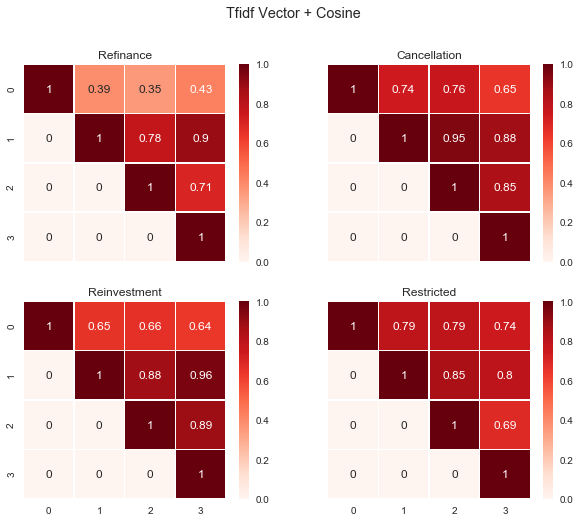

In [7]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(10,8)})
from matplotlib import cm as CM

fig, axn = plt.subplots(2,2, sharex=True, sharey=True)
count = 0
for ax in axn.flat:
    # triangle matrix
    corr_mat = np.triu(tfidf_score[count], k=0)
    sns.heatmap(corr_mat, annot=True, linewidths=.5, fmt='.2g', cmap="Reds", vmin=0, vmax=1, ax=ax)
    # original matrix
#     sns.heatmap(tfidf_score[count], annot=True, linewidths=.5, fmt='.2g', cmap="YlOrRd", vmin=0, vmax=1, ax=ax)
    ax.set_title(ax_name[count])  
    count += 1

fig.suptitle("Tfidf Vector + Cosine")  
plt.show()

- Advantage:

    - Quick when corpus is small or median

- Limitations:

    - Sparcity (When the corpus is very large), which will slow down the algebra operations.
 
    - Tf-idf matrix based on the word frequency which interprets in the vocabulary level, can't deal with semantic cases. （Can't understand 'no' or 'not') 
    
    - Can't count for word derivations.
    
- Possible Solutions:

    - Use sparse representation to speed up algebra operations by scipy.sparse package

    - Add extra weight to strong negative words like no/not/.. by changing countervector and transforming it to tfidfvector
    
    - Alternatively consider a collection of character n-grams, a representation resilient against misspellings and derivations.
    
             eg. if ngram = 5
            'jumpy fox' => 'jumpy', 'mpy f', 'py fo', 'umpy ', 'y fox'
            
    - HashingVectorizer for large corpus (not recommended)
            

## Word2Vec +  Cos Distance

In [8]:
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# model_path_list = ['./w2v_pretrained/GoogleNews-vectors-negative300.bin',
#                    './w2v_pretrained/apnews_sg.tar',
#                    './w2v_pretrained/apnews_dbow.tar',
#                    './w2v_pretrained/crawl-300d-2M.vec',
#                    './w2v_pretrained/glove_6B_100d.txt',
#                    './w2v_pretrained/glove_6B_200d.txt',
#                    './w2v_pretrained/glove_6B_300d.txt',
#                    './w2v_pretrained/glove_6B_50d.txt',
#                   ]

# # text format
# glove_input_file = model_path_list[-2] # Wikipedia 2014 + Gigaword 5 (300d)
# word2vec_output_file = './w2v_pretrained/300d.txt.word2vec'
# glove2word2vec(glove_input_file, word2vec_output_file)
# w2v_glove_300 = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False) 

# glove_input_file = model_path_list[-3] # Wikipedia 2014 + Gigaword 5 (200d)
# word2vec_output_file = './w2v_pretrained/200d.txt.word2vec'
# glove2word2vec(glove_input_file, word2vec_output_file)
# w2v_glove_200 = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False) 

# # bin format
# w2v_google = KeyedVectors.load_word2vec_format(model_path_list[0], binary=True)  # Google News

import gensim.downloader as api
w2v_wg_300 = api.load("glove-wiki-gigaword-300")  # Wikipedia 2014 + Gigaword 5 (300d)
w2v_wg_200 = api.load("glove-wiki-gigaword-200")  # Wikipedia 2014 + Gigaword 5 (200d)
w2v_google = api.load("word2vec-google-news-300")  # load pre-trained word-vectors from gensim-data

In [9]:
class DocSim(object):
    def __init__(self, w2v_model , stopwords=[]):
        self.w2v_model = w2v_model
        self.stopwords = stopwords

    def vectorize(self, doc):
        """Identify the vector values for each word in the given document"""
        doc = doc.lower()
        words = [w for w in doc.split(" ") if w not in self.stopwords]
        word_vecs = []
        for word in words:
            try:
                vec = self.w2v_model[word]
                word_vecs.append(vec)
            except KeyError:
                # Ignore, if the word doesn't exist in the vocabulary
                pass

        # Assuming that document vector is the mean of all the word vectors
        vector = np.mean(word_vecs, axis=0)
        return vector

    def _cosine_sim(self, vecA, vecB):
        """Find the cosine similarity distance between two vectors."""
        csim = np.dot(vecA, vecB) / (np.linalg.norm(vecA) * np.linalg.norm(vecB))
        if np.isnan(np.sum(csim)):
            return 0
        return csim

    def calculate_similarity(self, docs):
        """Calculates & returns similarity scores between documents."""
        length = len(docs)
        res = np.zeros((length, length))
        for i in range(length):
            for j in range(length):
                vec_i = self.vectorize(docs[i])
                vec_j = self.vectorize(docs[j])
                sim_score = self._cosine_sim(vec_i, vec_j)
                res[i][j] = sim_score
        return res

In [10]:
ds = DocSim(w2v_google)
w2v_cos_score = [ds.calculate_similarity(ref), 
                 ds.calculate_similarity(cancel), 
                 ds.calculate_similarity(rein), 
                 ds.calculate_similarity(restr)]

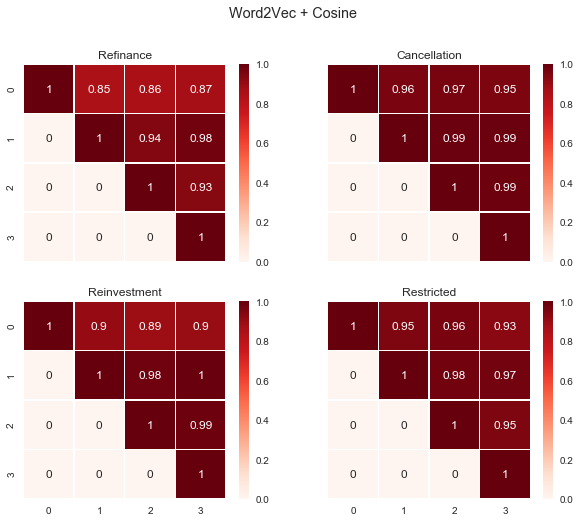

In [11]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(10,8)})
from matplotlib import cm as CM

fig, axn = plt.subplots(2,2, sharex=True, sharey=True)
count = 0
for ax in axn.flat:
    # triangle matrix
    corr_mat = np.triu(w2v_cos_score[count], k=0)
    sns.heatmap(corr_mat, annot=True, linewidths=.5, fmt='.2g', cmap="Reds", vmin=0, vmax=1, ax=ax)
    # original matrix
#     sns.heatmap(tfidf_score[count], annot=True, linewidths=.5, fmt='.2g', cmap="YlOrRd", vmin=0, vmax=1, ax=ax)
    ax.set_title(ax_name[count])  
    count += 1

fig.suptitle("Word2Vec + Cosine")  
plt.show()

- Advantage:

    - Word vector has more explainary power than Tf-idf matrix

- Limitation:
 
    - We use trained word vectors by Google/Facebook/Twitter. These word vectors are trained by daily news which cover a wide range of topics, thus word vectors that related to finance are quite similar. But our indentures focus more on legal and finance words, thus their cosine distrance will be highly close.

- Possible Solution:

    - Train word vectors ourselves by current indentures

## Word2Vec + WMD (Word Mover's Distance)

In [12]:
from pyemd import emd
from gensim.similarities import WmdSimilarity

In [13]:
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def normalize(text):
    def stem_tokens(tokens):
        return [stemmer.stem(item) for item in tokens]

    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

In [14]:
# text_list is the list of comparing texts, size is the length of text_list
def result(text_list, size, func):
    res = np.zeros(shape=(size, size))
    for i in range(0,size):
        for j in range(0,size):
            res[i][j] = func(text_list[i], text_list[j])
    return res

In [15]:
w2v_wmd_score = [1 - result([normalize(text) for text in ref], len(ref), w2v_google.wmdistance)/5, 
                 1 - result([normalize(text) for text in cancel], len(cancel), w2v_google.wmdistance)/5,
                 1 - result([normalize(text) for text in rein], len(rein), w2v_google.wmdistance)/5,
                 1 - result([normalize(text) for text in restr], len(restr), w2v_google.wmdistance)/5,]

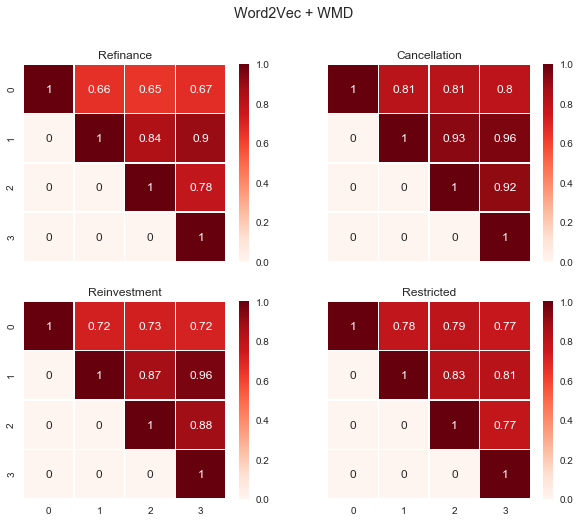

In [16]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(10,8)})
from matplotlib import cm as CM

fig, axn = plt.subplots(2,2, sharex=True, sharey=True)
count = 0
for ax in axn.flat:
    # triangle matrix
    corr_mat = np.triu(w2v_wmd_score[count], k=0)
    sns.heatmap(corr_mat, annot=True, linewidths=.5, fmt='.2g', cmap="Reds", vmin=0, vmax=1, ax=ax)
    # original matrix
#     sns.heatmap(tfidf_score[count], annot=True, linewidths=.5, fmt='.2g', cmap="YlOrRd", vmin=0, vmax=1, ax=ax)
    ax.set_title(ax_name[count])  
    count += 1

fig.suptitle("Word2Vec + WMD")  
plt.show()

- Advantages:

    - Word Mover's Distance add more weight to important words (with high frequency), rather than just perform algebra operations.
    
- Limitatons:

    - limitations in word vectors
    
- Possible Solution:

    - More extentions: Earth Mover Distance (EMD)/ Word Mover’s Distance (WMD)/ Relaxed Word Moving Distance (RWMD)
    
- Mechanism:

   <img src="./WMD.png">
   
   - The assumption is that similar words should have similar vectors.
   - It allows transfer every word from sentence 1 to sentence 2 because algorithm does not know “obama” should transfer to “president”. At the end it will choose the minimum transportation cost to transport every word from sentence 1 to sentence 2.

### WMD Algorithm

In [17]:
# WMD algorithm

from itertools import product
from collections import defaultdict
from scipy.spatial.distance import euclidean
import pulp

def tokens_to_fracdict(tokens):
    cntdict = defaultdict(lambda : 0)
    for token in tokens:
        cntdict[token] += 1
    totalcnt = sum(cntdict.values())
    return {token: float(cnt)/totalcnt for token, cnt in cntdict.items()}

def word_mover_distance_probspec(first_sent_tokens, second_sent_tokens, wvmodel, lpFile=None):
    all_tokens = list(set(first_sent_tokens+second_sent_tokens))
    wordvecs = {}
    for token in all_tokens:
        try:
            wordvecs[token] = wvmodel[token]
        except:
            wordvecs[token] = 0
            
    first_sent_buckets = tokens_to_fracdict(first_sent_tokens)
    second_sent_buckets = tokens_to_fracdict(second_sent_tokens)

    T = pulp.LpVariable.dicts('T_matrix', list(product(all_tokens, all_tokens)), lowBound=0)

    prob = pulp.LpProblem('WMD', sense=pulp.LpMinimize)
    prob += pulp.lpSum([T[token1, token2]*euclidean(wordvecs[token1], wordvecs[token2])
                        for token1, token2 in product(all_tokens, all_tokens)])
    for token2 in second_sent_buckets:
        prob += pulp.lpSum([T[token1, token2] for token1 in first_sent_buckets])==second_sent_buckets[token2]
    for token1 in first_sent_buckets:
        prob += pulp.lpSum([T[token1, token2] for token2 in second_sent_buckets])==first_sent_buckets[token1]

    if lpFile!=None:
        prob.writeLP(lpFile)

    prob.solve()

    return prob

def word_mover_distance(first_sent_tokens, second_sent_tokens, wvmodel, lpFile=None):
    prob = word_mover_distance_probspec(first_sent_tokens, second_sent_tokens, wvmodel, lpFile=lpFile)
    return pulp.value(prob.objective)

In [18]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

# remove punctuation, lowercase, stem
def normalize(text):
    res = nltk.word_tokenize(text.lower().translate(remove_punctuation_map))
    return [w for w in res if w not in stop_words]

prob = word_mover_distance_probspec(normalize(ref[0]), normalize(ref[1]), w2v_google)
print(pulp.value(prob.objective))

2.896323218997871


In [19]:
def new_result(text_list, size, func, w2v):
    res = np.zeros(shape=(size, size))
    for i in range(0,size):
        for j in range(0,size):
            res[i][j] = pulp.value(func(text_list[i], text_list[j], w2v).objective)
    return res

In [20]:
w2v_wmd_score_train = [1 - new_result([normalize(text) for text in ref], len(ref), word_mover_distance_probspec, w2v_google)/5, 
                 1 - new_result([normalize(text) for text in cancel], len(cancel), word_mover_distance_probspec, w2v_google)/5,
                 1 - new_result([normalize(text) for text in rein], len(rein), word_mover_distance_probspec, w2v_google)/5,
                 1 - new_result([normalize(text) for text in restr], len(restr), word_mover_distance_probspec, w2v_google)/5,]

## Sementic Texture Similarity

In [21]:
import tensorflow as tf
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" 

# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


INFO:tensorflow:Using /var/folders/df/jdb52f_x5vjcrdf9rqv8gbr00000gn/T/tfhub_modules to cache modules.


In [22]:
def sts(messages):
    similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
    similarity_message_encodings = embed(similarity_input_placeholder)
    
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        session.run(tf.tables_initializer())
        message_embeddings = session.run(similarity_message_encodings, 
                                         feed_dict={similarity_input_placeholder: messages})
    
    return message_embeddings

In [23]:
w2v_sts_score = [np.inner(sts(ref), sts(ref)), 
                 np.inner(sts(cancel), sts(cancel)),
                 np.inner(sts(rein), sts(rein)),
                 np.inner(sts(restr), sts(restr))]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


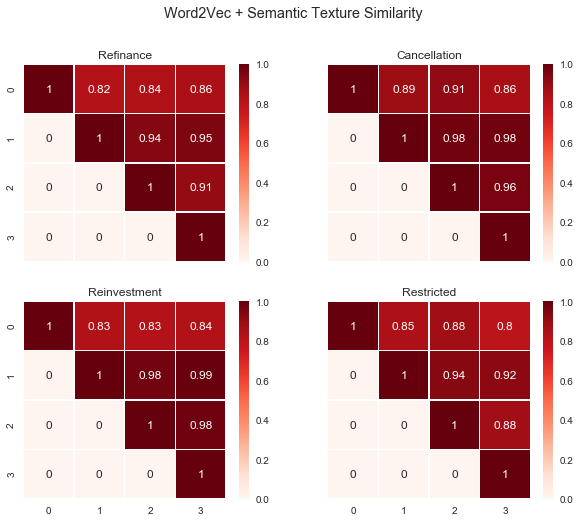

In [24]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(10,8)})
from matplotlib import cm as CM

fig, axn = plt.subplots(2,2, sharex=True, sharey=True)
count = 0
for ax in axn.flat:
    # triangle matrix
    corr_mat = np.triu(w2v_sts_score[count], k=0)
    sns.heatmap(corr_mat, annot=True, linewidths=.5, fmt='.2g', cmap="Reds", vmin=0, vmax=1, ax=ax)
    # original matrix
#     sns.heatmap(tfidf_score[count], annot=True, linewidths=.5, fmt='.2g', cmap="YlOrRd", vmin=0, vmax=1, ax=ax)
    ax.set_title(ax_name[count])  
    count += 1

fig.suptitle("Word2Vec + Semantic Texture Similarity")  
plt.show()

- Advantage:

recent proposed method, used Autoencoder/DNN.

- Limitation:
 
correlations are too close, which lead to high similarity score

- Possible Solution:

try Word Mover's Distance

## Latent Semantic Analysis

Useful for large corpus, could deal with computational expensive cases

Mechanism: 
1. Use SVD to decompose count vector (reduce the number of rows while preserving the similarity structure among columns)
2. Calculate cosine distance between two normalized vectors

In [25]:
from gensim.similarities.docsim import Similarity
from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile
from gensim.models import LsiModel

model = LsiModel(common_corpus[:3], id2word=common_dictionary)  # train model
vector = model[common_corpus[4]]  # apply model to BoW document

model.add_documents(common_corpus[4:])  # update model with new documents
tmp_fname = get_tmpfile("lsi.model")

model.save(tmp_fname)  # save model
loaded_model = LsiModel.load(tmp_fname)  # load model

In [26]:
vector

[(0, 1.0616129706264845), (1, 0.6666666666666672), (2, 0.14534802628780336)]

waiting to be updated after finishing PDF parsing...

# Score Table

In [27]:
def cal_score(ds):
    return [ds.calculate_similarity(ref), ds.calculate_similarity(cancel), 
            ds.calculate_similarity(rein), ds.calculate_similarity(restr),]

def wmd_score(word_vectors):
    return [1 - result([normalize(text) for text in ref], len(ref), word_vectors.wmdistance)/5, 
            1 - result([normalize(text) for text in cancel], len(cancel), word_vectors.wmdistance)/5,
            1 - result([normalize(text) for text in rein], len(rein), word_vectors.wmdistance)/5,
            1 - result([normalize(text) for text in restr], len(restr), word_vectors.wmdistance)/5,]

def new_wmd_score(w2v):
    return [1 - new_result([normalize(text) for text in ref], len(ref), word_mover_distance_probspec, w2v)/5, 
            1 - new_result([normalize(text) for text in cancel], len(cancel), word_mover_distance_probspec, w2v)/5,
            1 - new_result([normalize(text) for text in rein], len(rein), word_mover_distance_probspec, w2v)/5,
            1 - new_result([normalize(text) for text in restr], len(restr), word_mover_distance_probspec, w2v)/5,]

In [28]:
def extract(res):
    pair = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
    return [res[ele] for ele in pair]

In [29]:
# ************************ tfidf + cosine ***************************
tfidf_score 

# ************************ w2v + cosine ***************************

ds_google = DocSim(w2v_google)
ds_glove_200 = DocSim(w2v_wg_200)
ds_glove_300 = DocSim(w2v_wg_300)

# pretrained
w2v_cos_score # GoogleNews (300d)
w2v_cos_glove_200_score = cal_score(ds_glove_200) # Wikipedia 2014 + Gigaword 5 (200d)
w2v_cos_glove_300_score = cal_score(ds_glove_300) # Wikipedia 2014 + Gigaword 5 (300d)


new_model_path_list = ['./w2v_selftrained/w2v_25_sg.bin',
                       './w2v_selftrained/w2v_64_sg.bin',
                       './w2v_selftrained/w2v_100_sg.bin',
                       './w2v_selftrained/w2v_200_sg.bin',]

w2v_self_25 = KeyedVectors.load(new_model_path_list[0])  
w2v_self_64 = KeyedVectors.load(new_model_path_list[1])  
w2v_self_100 = KeyedVectors.load(new_model_path_list[2])  
w2v_self_200 = KeyedVectors.load(new_model_path_list[3])  
ds_25 = DocSim(w2v_self_25)
ds_64 = DocSim(w2v_self_64)
ds_100 = DocSim(w2v_self_100)
ds_200 = DocSim(w2v_self_200)

# selftrained
w2v_cos_25_score = cal_score(ds_25) # 25d
w2v_cos_64_score = cal_score(ds_64) # 64d
w2v_cos_100_score = cal_score(ds_100) # 100d
w2v_cos_200_score = cal_score(ds_200) # 200d

# ********************** w2v + wmd *****************************

# pretrained
w2v_wmd_score = wmd_score(w2v_google) # GoogleNews (300d)
w2v_wmd_glove_200_score = wmd_score(w2v_wg_200) # Wikipedia 2014 + Gigaword 5 (200d)
w2v_wmd_glove_300_score = wmd_score(w2v_wg_300) # Wikipedia 2014 + Gigaword 5 (300d)



# selftrained
w2v_wmd_25_score = new_wmd_score(w2v_self_25) # 25d
w2v_wmd_64_score = new_wmd_score(w2v_self_64) # 64d
w2v_wmd_100_score = new_wmd_score(w2v_self_100) # 100d
w2v_wmd_200_score = new_wmd_score(w2v_self_200) # 200d

# ************************ STS ***************************
w2v_sts_score
print()
# ************************ LSA ***************************
# will be updated after finishing PDF parsing

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [30]:
score = [tfidf_score, 
         w2v_cos_score, w2v_cos_glove_200_score, w2v_cos_glove_300_score,
        w2v_cos_25_score, w2v_cos_64_score, w2v_cos_100_score, w2v_cos_200_score, 
         w2v_wmd_score, w2v_wmd_glove_200_score, w2v_wmd_glove_300_score,
        w2v_wmd_25_score, w2v_wmd_64_score, w2v_wmd_100_score, w2v_wmd_200_score,
         w2v_sts_score]

index = ['Tfidf_vector cosine',
        'Google_w2v cosine', 'WG200_w2v cosine', 'WG300_w2v cosine',
        'CLO25_w2v cosine', 'CLO64_w2v cosine', 'CLO100_w2v cosine', 'CLO200_w2v cosine',
         'Google_w2v wmd', 'WG200_w2v wmd', 'WG300_w2v wmd',
         'CLO25_w2v wmd', 'CLO64_w2v wmd', 'CLO100_w2v wmd', 'CLO200_w2v wmd',
         'Google_w2v sts'
        ]
column = ['1-2 ','1-3 ','1-4 ','2-3 ','2-4 ','3-4 ']

In [31]:
df_refi = pd.DataFrame.from_records([extract(x[0]) for x in score],index=index, columns=[x+'Refinance' for x in column])
df_cancel = pd.DataFrame.from_records([extract(x[1]) for x in score],index=index, columns=[x+'Cancellation' for x in column])
df_rein = pd.DataFrame.from_records([extract(x[2]) for x in score],index=index, columns=[x+'Reinvestment' for x in column])
df_restr = pd.DataFrame.from_records([extract(x[3]) for x in score],index=index, columns=[x+'Restricted' for x in column])

In [32]:
df = df_refi.join(df_cancel)
df = df.join(df_rein)
df = df.join(df_restr)

In [33]:
pd.set_option('display.max_columns', 30)
df

,1-2 Refinance,1-3 Refinance,1-4 Refinance,2-3 Refinance,2-4 Refinance,3-4 Refinance,1-2 Cancellation,1-3 Cancellation,1-4 Cancellation,2-3 Cancellation,2-4 Cancellation,3-4 Cancellation,1-2 Reinvestment,1-3 Reinvestment,1-4 Reinvestment,2-3 Reinvestment,2-4 Reinvestment,3-4 Reinvestment,1-2 Restricted,1-3 Restricted,1-4 Restricted,2-3 Restricted,2-4 Restricted,3-4 Restricted
Tfidf_vector cosine,0.387811,0.353413,0.426409,0.777673,0.895887,0.706559,0.738501,0.760775,0.647280,0.946774,0.879281,0.847541,0.653349,0.660877,0.637498,0.879443,0.958838,0.890045,0.790123,0.789237,0.744650,0.851571,0.800656,0.687275
Google_w2v cosine,0.848443,0.856130,0.874114,0.943567,0.979506,0.934601,0.959090,0.968317,0.953948,0.991690,0.990559,0.985481,0.904784,0.894102,0.900030,0.983011,0.995399,0.986886,0.953104,0.962524,0.927918,0.980448,0.972861,0.952804
WG200_w2v cosine,0.973480,0.975120,0.978471,0.989103,0.996102,0.987908,0.990485,0.992827,0.988645,0.997965,0.997930,0.997371,0.984360,0.981082,0.981559,0.996456,0.998879,0.997074,0.991489,0.992053,0.987231,0.994499,0.992973,0.986164
WG300_w2v cosine,0.958904,0.959294,0.966082,0.983478,0.993932,0.980018,0.984351,0.988583,0.981644,0.996729,0.997047,0.995911,0.973026,0.967815,0.968949,0.994188,0.998173,0.994982,0.987076,0.987662,0.980897,0.991413,0.989183,0.979034
CLO25_w2v cosine,0.977912,0.974012,0.983645,0.996305,0.998159,0.994562,0.995875,0.995757,0.995669,0.999633,0.999561,0.999313,0.993481,0.986937,0.991192,0.997538,0.999229,0.998613,0.995573,0.998103,0.994109,0.997418,0.997416,0.995152
CLO64_w2v cosine,0.972746,0.967347,0.979871,0.993066,0.997218,0.990672,0.993875,0.993998,0.993888,0.999294,0.999406,0.998989,0.990668,0.985070,0.987715,0.997181,0.998999,0.998131,0.994411,0.996899,0.991230,0.996578,0.995976,0.992220
CLO100_w2v cosine,0.969103,0.962388,0.976089,0.991517,0.996958,0.988855,0.992405,0.992855,0.992037,0.999042,0.999249,0.998580,0.989028,0.983623,0.986394,0.996100,0.998915,0.997371,0.993891,0.996301,0.990853,0.996350,0.995472,0.991704
CLO200_w2v cosine,0.964848,0.956539,0.973182,0.989492,0.996446,0.986240,0.991030,0.991620,0.990576,0.998688,0.998959,0.997915,0.985073,0.980628,0.982497,0.995607,0.998669,0.996716,0.992212,0.994436,0.988523,0.995308,0.994343,0.988723
Google_w2v wmd,0.420738,0.406368,0.444765,0.727641,0.820829,0.650628,0.659857,0.679437,0.648912,0.871240,0.931937,0.859863,0.527529,0.532186,0.526230,0.814773,0.922581,0.838840,0.616421,0.705164,0.547908,0.708505,0.709626,0.611781
WG200_w2v wmd,-0.120060,-0.159541,-0.073800,0.455389,0.637333,0.293403,0.346109,0.386023,0.331596,0.744401,0.847394,0.731203,0.084401,0.096524,0.076257,0.630662,0.855309,0.666909,0.210411,0.393770,0.097916,0.413133,0.463125,0.225718


In [ ]:
# CLO100_w2v wmd